In [1]:
%load_ext autoreload
%autoreload 2

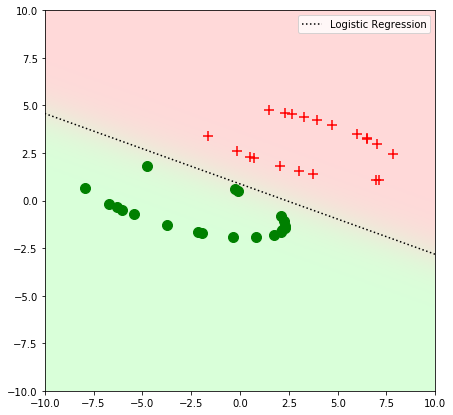

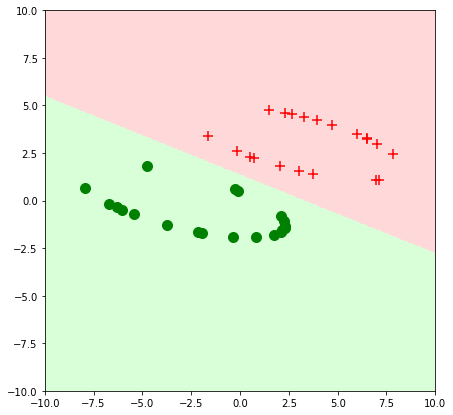

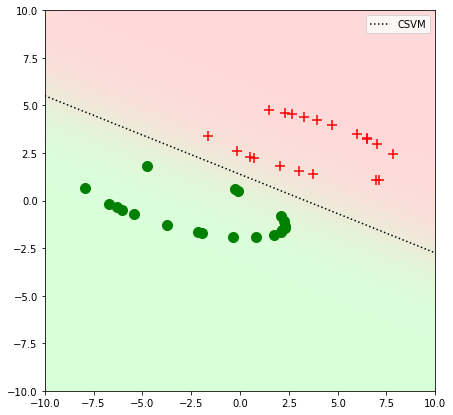

In [3]:
import numpy as np
from cs771 import genSyntheticData as gsd
from cs771 import plotData as pd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import LinearSVC as csvm

muPos = np.array( [-3,0] )
muNeg = np.array( [3,3] )
cov = np.array( [[16, -14] , [-14, 16]] )

d = 2 
n = 20

XPos = gsd.genEllipticalData( d, n, muPos, cov )
XNeg = gsd.genEllipticalData( d, n, muNeg, cov )

yPos = np.ones( (n,) )
yNeg = -np.ones( (n,) )
X = np.vstack( (XPos, XNeg) )
y = np.concatenate( (yPos, yNeg) )

# Perform logistic regression on this data
# You would note that logistic regression need not necessarily maximize margin
# Note that close to the decision boundary, logistic regression gives confused PMFs (color neither green nor red)
# Far away from the decision boundary, logistic regression gives confident answer (color either dark red or dark green)
clf = lr( penalty= "l2", C = 1.0, fit_intercept = True, solver = "liblinear" )
clf.fit( X, y )

def logRegBatch( X ):
    # The predict_proba routine returns the entire PMF. We only need P[y = 1] to perform shading
    return clf.predict_proba( X )[:,1]

fig = pd.getFigure( 7, 7 )
pd.shade2DProb( logRegBatch, fig, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig, color = 'r', marker = '+' )
pd.plotLine( clf.coef_.T, clf.intercept_, fig, linestyle = ':', label = "Logistic Regression" )

# Also learn a CSVM on the same data
# CSVM offers good margin on the data
clf2 = csvm( penalty= "l2", loss = "hinge", C = 1.0, fit_intercept = True )
clf2.fit( X, y )

def CSVM( X ):
    # The predict routine returns either -1 or +1
    # We could have also just returned clf2.predict( X )
    return np.sign(X.dot(clf2.coef_.T) + clf2.intercept_)

fig2 = pd.getFigure( 7, 7 )
pd.shade2D( CSVM, fig2, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig2, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig2, color = 'r', marker = '+' )

# CSVM does not itself offer probabilistic predictions - however, we can use the sigmoidal map on CSVM scores too
def CSVMProb( X ):
    w = clf2.coef_.T
    b = clf2.intercept_
    score = X.dot(w) + b
    return 1/(1 + np.exp(-score))

fig3 = pd.getFigure( 7, 7 )
pd.shade2DProb( CSVMProb, fig3, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig3, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig3, color = 'r', marker = '+' )
pd.plotLine( clf2.coef_.T, clf2.intercept_, fig3, linestyle = ':', label = "CSVM" )

c:\users\purushot\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


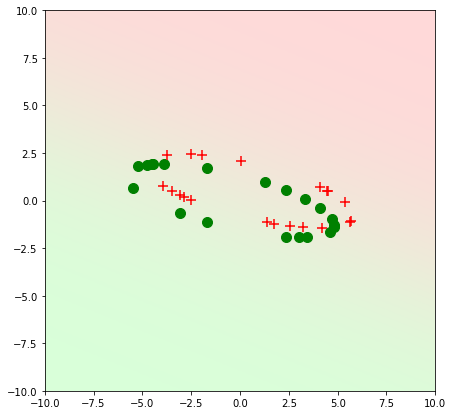

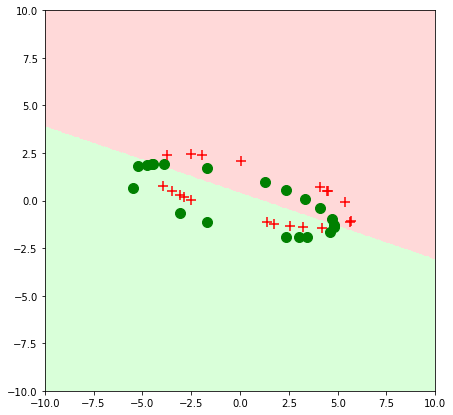

In [4]:
muPos = np.array( [-0.5,0] )
muNeg = np.array( [0.5,0.5] )
cov = np.array( [[16, -14] , [-14, 16]] )

XPos = gsd.genEllipticalData( d, n, muPos, cov )
XNeg = gsd.genEllipticalData( d, n, muNeg, cov )

yPos = np.ones( (n,) )
yNeg = -np.ones( (n,) )
X = np.vstack( (XPos, XNeg) )
y = np.concatenate( (yPos, yNeg) )

clf.fit( X, y )
clf2.fit( X, y )

# If data is badly mixed up or not linearly separable, then probabilistic methods become very useful

# Logistic regression on the other hand, gives us a PMF which we can use to gauge confidence of the model on a data point
# If confidene of a model is low on a data point, we may ask some other model/even a human to classify that data point
# Note: here, even training points are lying in low-confidence regions where the color is not completely red/green
fig3 = pd.getFigure( 7, 7 )
pd.shade2DProb( logRegBatch, fig3, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig3, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig3, color = 'r', marker = '+' )

# CSVM labels themselves do not tell us crisply whether a data point is dangerously close to decision boundary or not
fig4 = pd.getFigure( 7, 7 )
pd.shade2D( CSVM, fig4, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig4, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig4, color = 'r', marker = '+' )